[Refernece](http://docs.opencv.org/3.0.0/dc/dc3/tutorial_py_matcher.html) - Feature Matching

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

In [2]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

In [3]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [4]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [5]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [6]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = np.zeros((100,100,3), np.uint8)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3, flags=2)

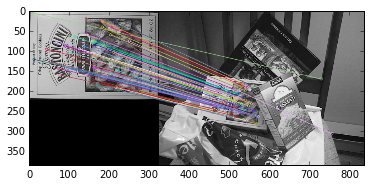

In [7]:
plt.imshow(img3)